In [1]:
from sklearn.datasets import fetch_openml, load_digits
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import math

In [2]:
def Euclidean_distance(row1,row2):
    distance=0
    for i in range(len(row1)-1):
        distance+=(row1[i]-row2[i])**2
    return np.sqrt(distance)


In [3]:
def Get_Neighbors(train, test_row, num):
    distance=list()
    data=list()
    for i in train:
        dist=Euclidean_distance(test_row,i)
        distance.append(dist)
        data.append(i)
        
    distance = np.array(distance)
    data = np.array(data)
        
     #Finding the index in ascending order
    index_dist = distance.argsort()
 #Arranging data according to index
    data = data[index_dist]
 #slicing k value from number of data
    neighbors = data[:num]
 
    return neighbors
    
        
       

In [4]:
def predict_classification(train, test_row, num):
    
    Neighbors = Get_Neighbors(train, test_row, num)
    
    Classes = []
    
    for i in Neighbors:
        
        Classes.append(i[-1])
        
        prediction = max(Classes, key= Classes.count)
        
        return prediction

In [5]:
def accuracy(y_true,y_pred):
    n_correct=0
    for i in range(len(y_true)):
        if y_true[i]== y_pred[i]:
            n_correct+=1
    acc=n_correct/len(y_true)
    return acc

In [6]:
#mnist = fetch_openml('mnist_784') #load_digits()

In [7]:
mnist = load_digits()

In [8]:
# checking the column names and preprocessing target values in standard format
mnist.keys()
mnist.target = mnist.target.astype(np.int8)



In [9]:
#Determining independent and dependent variable and finding the shape
x = np.array(mnist.data)
y = np.array(mnist.target)
x.shape, y.shape


((1797, 64), (1797,))

In [10]:
# shuffling the values of x and y
si = np.random.permutation(x.shape[0])
x = x[si]
y = y[si]

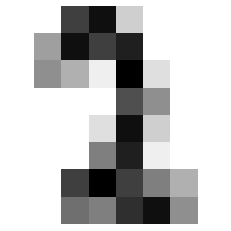

In [11]:
some_digit = x[12]
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()


In [12]:
#slicing data
trainx = x[:20000]
trainy = y[:20000]
#Inserting trainy in trainx
train = np.insert(trainx, 64, trainy, axis = 1)
prediction = predict_classification(train, train[1244], 4)
prediction

1.0

In [13]:
train[1244][-1]


1.0

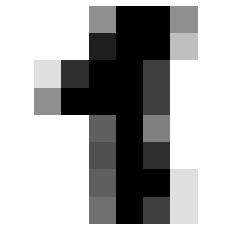

In [14]:
#Plotting the output
some_digit = train[1244][:-1]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()


In [15]:
y_pred=[]
y_true=train[:,-1]
for i in range(len(train)):
    prediction = predict_classification(train, train[i], 4)
y_pred.append(prediction)
# Accuracy
accuracy(y_true, y_pred)


IndexError: list index out of range